## Makine Öğrenmesi ile Yetenek Avcılığı Sınıflandırma
### İş Problemi
Scout’lar tarafından izlenen futbolcuların özelliklerine verilen puanlara göre, oyuncuların hangi sınıf
(average, highlighted) oyuncu olduğunu tahminleme.
### Veri Seti Hikayesi
Veri seti Scoutium’dan maçlarda gözlemlenen futbolcuların özelliklerine göre scoutların değerlendirdikleri futbolcuların, maç içerisinde puanlanan özellikleri ve puanlarını içeren bilgilerden oluşmaktadır.
#### scoutium_attributes.csv
8 Değişken, 10.730 Gözlem, 527 KB
- task_response_id: Bir scoutun bir maçta bir takımın kadrosundaki tüm oyunculara dair değerlendirmelerinin kümesi
- match_id: İlgili maçın id'si
- evaluator_id: Değerlendiricinin(scout'un) id'si
- player_id: İlgili oyuncunun id'si
- position_id: İlgili oyuncunun o maçta oynadığı pozisyonun id’si
    - 1: Kaleci
    - 2: Stoper
    - 3: Sağ bek
    - 4: Sol bek
    - 5: Defansif orta saha
    - 6: Merkez orta saha
    - 7: Sağ kanat
    - 8: Sol kanat
    - 9: Ofansif orta saha
    - 10: Forvet
- analysis_id: Bir scoutun bir maçta bir oyuncuya dair özellik değerlendirmelerini içeren küme
- attribute_id: Oyuncuların değerlendirildiği her bir özelliğin id'si
- attribute_value: Bir scoutun bir oyuncunun bir özelliğine verdiği değer(puan)

#### scoutium_potential_labels.csv
5 Değişken, 322 Gözlem, 12 KB
- task_response_id: Bir scoutun bir maçta bir takımın kadrosundaki tüm oyunculara dair değerlendirmelerinin kümesi
- match_id: İlgili maçın id'si
- evaluator_id: Değerlendiricinin(scout'un) id'si
- player_id: İlgili oyuncunun id'si
- potential_label: Bir scoutun bir maçta bir oyuncuyla ilgili nihai kararını belirten etiket. (hedef değişken)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Görevler
----

Adım1: scoutium_attributes.csv ve scoutium_potential_labels.csv dosyalarını okutunuz.

In [27]:
scoutium_attributes = pd.read_csv("C:/Users/htcso/OneDrive/Masaüstü/pythonProject/machine_learning/data/scoutium_attributes.csv",
                                 sep = ";")
scoutium_attributes.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value
0,4915,62935,177676,1361061,2,12818495,4322,56.0
1,4915,62935,177676,1361061,2,12818495,4323,56.0
2,4915,62935,177676,1361061,2,12818495,4324,67.0
3,4915,62935,177676,1361061,2,12818495,4325,56.0
4,4915,62935,177676,1361061,2,12818495,4326,45.0


In [28]:
scoutium_potential_labels =  pd.read_csv("C:/Users/htcso/OneDrive/Masaüstü/pythonProject/machine_learning/data/scoutium_potential_labels.csv",
                                 sep = ";")
scoutium_potential_labels.head()

,task_response_id,match_id,evaluator_id,player_id,potential_label
0,4915,62935,177676,1361061,average
1,4915,62935,177676,1361626,highlighted
2,4915,62935,177676,1361858,average
3,4915,62935,177676,1362220,highlighted
4,4915,62935,177676,1364951,highlighted


Adım2: Okutmuş olduğumuz csv dosyalarını merge fonksiyonunu kullanarak birleştiriniz.
("task_response_id", 'match_id', 'evaluator_id' "player_id" 4 adet değişken üzerinden birleştirme işlemini gerçekleştiriniz.)

In [46]:
df = scoutium_attributes.merge(scoutium_potential_labels,
                               on = ["task_response_id", "match_id", "evaluator_id", "player_id"])
df.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.0,average
1,4915,62935,177676,1361061,2,12818495,4323,56.0,average
2,4915,62935,177676,1361061,2,12818495,4324,67.0,average
3,4915,62935,177676,1361061,2,12818495,4325,56.0,average
4,4915,62935,177676,1361061,2,12818495,4326,45.0,average


Adım3: position_id içerisindeki Kaleci (1) sınıfını veri setinden kaldırınız.

In [47]:
df = df[~ (df["position_id"] == 1)]

In [48]:
any(df["position_id"] == 1)

False

Adım4: potential_label içerisindeki below_average sınıfını veri setinden kaldırınız.( below_average sınıfı tüm verisetinin %1'ini oluşturur)

In [49]:
df = df[~ (df["potential_label"] == "below_average")]

In [50]:
any(df["potential_label"] == "below_average")

False

Adım5: Oluşturduğunuz veri setinden “pivot_table” fonksiyonunu kullanarak bir tablo oluşturunuz. Bu pivot table'da her satırda bir oyuncu olacak şekilde manipülasyon yapınız.
- Adım1: İndekste “player_id”,“position_id” ve “potential_label”, sütunlarda “attribute_id” ve değerlerde scout’ların oyunculara verdiği puan “attribute_value” olacak şekilde pivot table’ı oluşturunuz.
- Adım2: “reset_index” fonksiyonunu kullanarak indeksleri değişken olarak atayınız ve “attribute_id” sütunlarının isimlerini stringe çeviriniz.

In [83]:
df_pivot = pd.pivot_table(data = df,
                          index = ["player_id", "position_id", "potential_label"],
                          columns = ["attribute_id"],
                          values = ["attribute_value"])
df_pivot.head()

attribute_value                          \
attribute_id                                     4322  4323  4324  4325  4326   
player_id position_id potential_label                                           
1355710   7           average                    50.5  50.5  34.0  50.5  45.0   
1356362   9           average                    67.0  67.0  67.0  67.0  67.0   
1356375   3           average                    67.0  67.0  67.0  67.0  67.0   
          4           average                    67.0  78.0  67.0  67.0  67.0   
1356411   9           average                    67.0  67.0  78.0  78.0  67.0   

                                                                     ...  \
attribute_id                           4327  4328  4329  4330  4332  ...   
player_id position_id potential_label                                ...   
1355710   7           average          45.0  45.0  45.0  50.5  56.0  ...   
1356362   9           average          67.0  67.0  67.0  67.0  67.0  ...   
1356375   3           average          67.0  67.0  78.0  67.0  67.0  ...   
          4           average          78.0  78.0  78.0  56.0  67.0  ...   
1356411   9           average          67.0  67.0  67.0  89.0  78.0  ...   

                                                                           \
attribute_id                           4352  4353  4354  4355  4356  4357   
player_id position_id potential_label                                       
1355710   7           average          56.0  34.0  39.5  50.5  34.0  34.0   
1356362   9           average          67.0  67.0  78.0  67.0  67.0  67.0   
1356375   3           average          67.0  67.0  78.0  67.0  67.0  67.0   
          4           average          78.0  67.0  67.0  67.0  56.0  67.0   
1356411   9           average          67.0  56.0  67.0  67.0  56.0  67.0   

                                                               
attribute_id                           4407  4408  4423  4426  
player_id position_id potential_label                          
1355710   7           average          56.0  34.0  34.0  56.0  
1356362   9           average          67.0  67.0  56.0  78.0  
1356375   3           average          67.0  67.0  56.0  78.0  
          4           average          56.0  67.0  45.0  56.0  
1356411   9           average          89.0  56.0  67.0  78.0  

[5 rows x 34 columns]

In [84]:
df_pivot = df_pivot.reset_index()

In [85]:
df_pivot.head()

player_id position_id potential_label attribute_value        \
attribute_id                                                  4322  4323   
0              1355710           7         average            50.5  50.5   
1              1356362           9         average            67.0  67.0   
2              1356375           3         average            67.0  67.0   
3              1356375           4         average            67.0  78.0   
4              1356411           9         average            67.0  67.0   

                                            ...                                \
attribute_id  4324  4325  4326  4327  4328  ...  4352  4353  4354  4355  4356   
0             34.0  50.5  45.0  45.0  45.0  ...  56.0  34.0  39.5  50.5  34.0   
1             67.0  67.0  67.0  67.0  67.0  ...  67.0  67.0  78.0  67.0  67.0   
2             67.0  67.0  67.0  67.0  67.0  ...  67.0  67.0  78.0  67.0  67.0   
3             67.0  67.0  67.0  78.0  78.0  ...  78.0  67.0  67.0  67.0  56.0   
4             78.0  78.0  67.0  67.0  67.0  ...  67.0  56.0  67.0  67.0  56.0   

                                            
attribute_id  4357  4407  4408  4423  4426  
0             34.0  56.0  34.0  34.0  56.0  
1             67.0  67.0  67.0  56.0  78.0  
2             67.0  67.0  67.0  56.0  78.0  
3             67.0  56.0  67.0  45.0  56.0  
4             67.0  89.0  56.0  67.0  78.0  

[5 rows x 37 columns]

In [86]:
df_pivot = df_pivot.droplevel(level=0, axis=1)
df_pivot.head()

attribute_id,,,,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,average,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,average,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,average,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0


In [87]:
df_pivot.columns = df_pivot.columns.astype("str")

In [93]:
df_pivot = df_pivot.rename_axis(columns=None)

In [94]:
df_pivot.head()

,,,,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,average,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,average,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,average,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0


In [98]:
cols = list(df_pivot.columns)
cols[0] = "player_id"
cols[1] = "position_id"
cols[2] = "potential_label"

df_pivot.columns = cols
df_pivot.head()

,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,average,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,average,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,average,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0


Adım6: Label Encoder fonksiyonunu kullanarak “potential_label” kategorilerini (average, highlighted) sayısal olarak ifade ediniz.

In [110]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [101]:
df = df_pivot
df["potential_label"] = LabelEncoder().fit_transform(df["potential_label"])
df.head()

,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,0,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,0,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,0,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0


Adım7: Sayısal değişken kolonlarını “num_cols” adıyla bir listeye atayınız.

In [102]:
df.shape

(271, 37)

In [108]:
num_cols = [col for col in df.columns if col not in ["player_id", "position_id", "potential_label"]]
num_cols

['4322',
 '4323',
 '4324',
 '4325',
 '4326',
 '4327',
 '4328',
 '4329',
 '4330',
 '4332',
 '4333',
 '4335',
 '4338',
 '4339',
 '4340',
 '4341',
 '4342',
 '4343',
 '4344',
 '4345',
 '4348',
 '4349',
 '4350',
 '4351',
 '4352',
 '4353',
 '4354',
 '4355',
 '4356',
 '4357',
 '4407',
 '4408',
 '4423',
 '4426']

Adım8: Kaydettiğiniz bütün “num_cols” değişkenlerindeki veriyi ölçeklendirmek için StandardScaler uygulayınız.

In [111]:
df[num_cols] = StandardScaler().fit_transform(df[num_cols])
df.head()

,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,0,-0.542606,-0.559398,-1.404764,-0.437916,-0.766602,-0.794802,-0.907351,...,0.012848,-1.281899,-1.132245,-0.494569,-1.234869,-1.519578,-0.142650,-1.487256,-0.955381,-0.252741
1,1356362,9,0,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,...,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611
2,1356375,3,0,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,...,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611
3,1356375,4,0,0.595327,1.307560,0.678677,0.682837,0.722639,1.481795,1.355461,...,1.560314,0.813645,0.428479,0.631718,0.198319,0.768231,-0.142650,0.668713,-0.275832,-0.252741
4,1356411,9,0,0.595327,0.560776,1.373158,1.430006,0.722639,0.722929,0.601190,...,0.786581,0.115130,0.428479,0.631718,0.198319,0.768231,1.874292,-0.049944,1.083267,1.041611


In [121]:
df = pd.get_dummies(data = df, columns = ["position_id"], drop_first=True, prefix="pos")
df.head()

,player_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,...,4423,4426,pos_3,pos_4,pos_5,pos_6,pos_7,pos_8,pos_9,pos_10
0,1355710,0,-0.542606,-0.559398,-1.404764,-0.437916,-0.766602,-0.794802,-0.907351,-0.791605,...,-0.955381,-0.252741,0,0,0,0,1,0,0,0
1,1356362,0,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,0.404075,...,0.403717,1.041611,0,0,0,0,0,0,1,0
2,1356375,0,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,1.001915,...,0.403717,1.041611,1,0,0,0,0,0,0,0
3,1356375,0,0.595327,1.307560,0.678677,0.682837,0.722639,1.481795,1.355461,1.001915,...,-0.275832,-0.252741,0,1,0,0,0,0,0,0
4,1356411,0,0.595327,0.560776,1.373158,1.430006,0.722639,0.722929,0.601190,0.404075,...,1.083267,1.041611,0,0,0,0,0,0,1,0


Adım9: Elimizdeki veri seti üzerinden minimum hata ile futbolcuların potansiyel etiketlerini tahmin eden bir makine öğrenmesi modeli geliştiriniz. (Roc_auc, f1, precision, recall, accuracy metriklerini yazdırınız.)

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate, GridSearchCV

In [123]:
X = df.drop(["player_id", "potential_label"], axis=1)
y = df["potential_label"]

In [116]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVC', SVC()),
          ('GBM', GradientBoostingClassifier()),
          ("XGBoost", XGBClassifier(objective='reg:squarederror')),
          ("LightGBM", LGBMClassifier())]

In [127]:
for name, model in models:
    cv_results = cross_validate(model, X, y, 
                                cv=5, 
                                n_jobs=-1, 
                                verbose=True,
                                scoring = ["roc_auc", "f1", "precision", "recall", "accuracy"])
    print(f"########## {name} ##########")
    print("roc_auc: {}".format(round(cv_results["test_roc_auc"].mean(), 4)))
    print("f1: {}".format(round(cv_results["test_f1"].mean(), 4)))
    print("precision: {}".format(round(cv_results["test_precision"].mean(), 4)))
    print("recall: {}".format(round(cv_results["test_recall"].mean(), 4)))
    print("accuracy: {}".format(round(cv_results["test_accuracy"].mean(), 4)))
    print("\n")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


########## LR ##########
roc_auc: 0.8242
f1: 0.5816
precision: 0.6955
recall: 0.5167
accuracy: 0.8488




[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


########## KNN ##########
roc_auc: 0.7922
f1: 0.3957
precision: 0.86
recall: 0.2652
accuracy: 0.8412




[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


########## CART ##########
roc_auc: 0.7246
f1: 0.5457
precision: 0.5041
recall: 0.6212
accuracy: 0.7861




[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


########## RF ##########
roc_auc: 0.9038
f1: 0.5915
precision: 0.8933
recall: 0.4606
accuracy: 0.8745


########## SVC ##########
roc_auc: 0.8646
f1: 0.4088
precision: 0.96
recall: 0.2667
accuracy: 0.845




[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


########## GBM ##########
roc_auc: 0.8591
f1: 0.5984
precision: 0.7421
recall: 0.5303
accuracy: 0.8598




[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


########## XGBoost ##########
roc_auc: 0.8805
f1: 0.6366
precision: 0.6861
recall: 0.6212
accuracy: 0.8527


########## LightGBM ##########
roc_auc: 0.8918
f1: 0.62
precision: 0.8051
recall: 0.5318
accuracy: 0.8708




[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


In [130]:
rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500],
                   "colsample_bytree": [0.7, 1]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200],
                  "colsample_bytree": [0.5, 1]}

gbm_params = {"learning_rate": [0.01, 0.1, 0.001],
              "max_depth": [3, 5, 7, None],
              "n_estimators": [100, 500, 1000],
              "subsample": [1, 0.5, 0.7]}

In [131]:
classifiers = [('RF', RandomForestClassifier(), rf_params),
               ("LightGBM", LGBMClassifier(), lgbm_params),
               ("XGBoost", XGBClassifier(objective='reg:squarederror'), xgb_params),
               ('GBM', GradientBoostingClassifier(), gbm_params)]

In [142]:
import warnings
warnings.filterwarnings('ignore')

In [144]:
best_models = {}

for name, classifier, params in classifiers:
    print(f"########## {name} ##########")
    cv_results = cross_validate(classifier, X, y, cv=5)
    print(f"Before test_score: {round(cv_results['test_score'].mean(), 4)}")

    gs_best = GridSearchCV(classifier, params, cv=5, n_jobs=-1, verbose=False).fit(X, y)
    final_model = classifier.set_params(**gs_best.best_params_)

    cv_results = cross_validate(final_model, X, y, cv=5)
    print(f"After test_score: {round(cv_results['test_score'].mean(), 4)}")
    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
    best_models[name] = final_model
print(best_models)

########## RF ##########
Before test_score: 0.878
After test_score: 0.8782
RF best params: {'max_depth': 8, 'max_features': 7, 'min_samples_split': 15, 'n_estimators': 300}

########## LightGBM ##########
Before test_score: 0.8857
After test_score: 0.8857
LightGBM best params: {'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 500}

########## XGBoost ##########
Before test_score: 0.8894
After test_score: 0.8894
XGBoost best params: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 1000}

########## GBM ##########
Before test_score: 0.8637
After test_score: 0.8931
GBM best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.7}

{'RF': RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=15,
                       n_estimators=300), 'LightGBM': LGBMClassifier(colsample_bytree=1, learning_rate=0.01, n_estimators=500), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
     

In [166]:
gbm_model = GradientBoostingClassifier(max_depth=5, n_estimators=1000, subsample=0.7).fit(X, y)

Adım10: Değişkenlerin önem düzeyini belirten feature_importance fonksiyonunu kullanarak özelliklerin sıralamasını çizdiriniz.

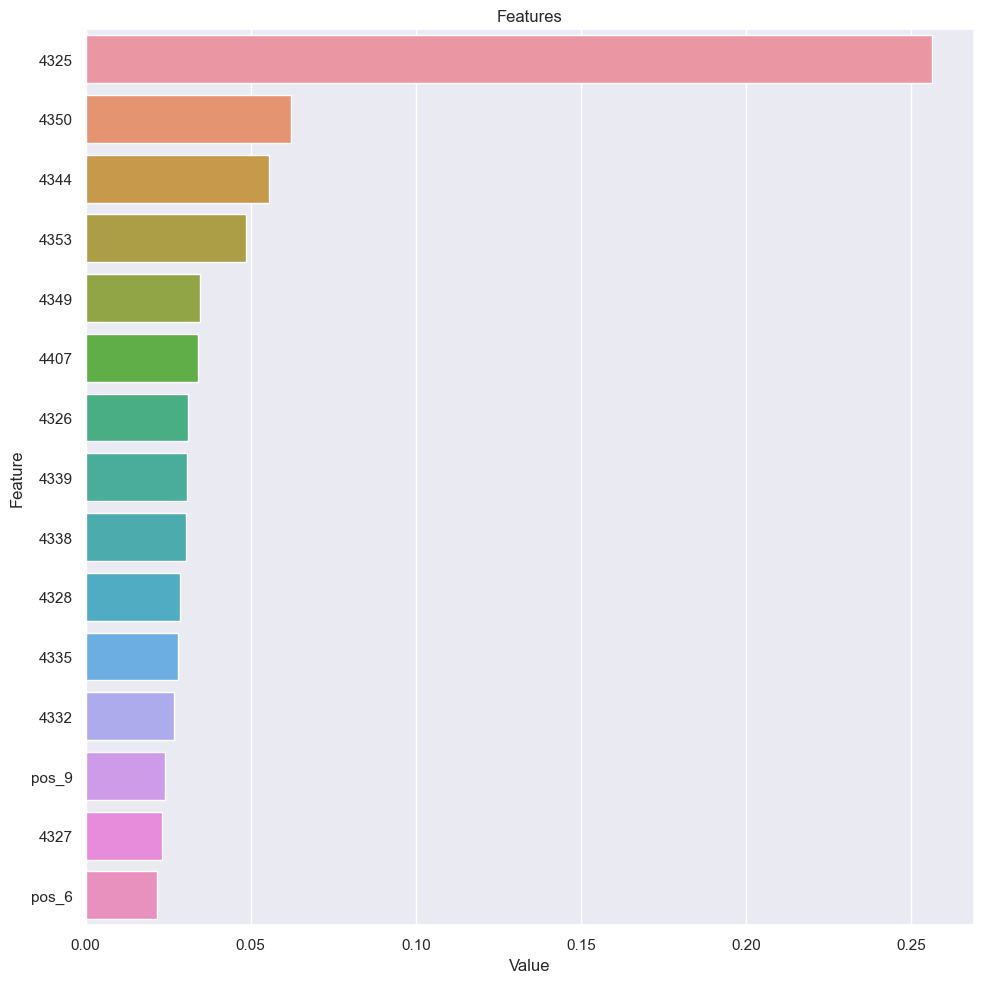

In [168]:
feature_imp = pd.DataFrame({'Value': gbm_model.feature_importances_, 'Feature': X.columns})
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:15])
plt.title('Features')
plt.tight_layout()